# Project Title - Urban_traffic_Density_Prediction

Dataset Overview

This dataset provides a detailed view of traffic data in a futuristic urban environment, containing over 1.2 million records. Each record represents a unique snapshot of various factors affecting traffic conditions in six fictional cities.

Features

City: Name of the city (e.g., MetropolisX, SolarisVille).
Vehicle Type: Type of vehicle (e.g., Car, Flying Car).
Weather Conditions: Current weather (e.g., Clear, Rainy).
Economic Conditions: Economic state of the city (e.g., Booming, Recession).
Day of Week: Day of the week.
Hour of Day: Hour of the day when the data was recorded.
Speed: Recorded vehicle speed.
Energy Consumption: Estimated energy consumption based on vehicle type and speed.
Is Peak Hour: Indicator if the record was during peak traffic hours.
Random Event Occurred: Indicator if a random event (e.g., accidents, road closures) occurred.
Traffic Density: Density of traffic at the time of recording.
File Format

The dataset is provided in CSV format, suitable for analysis in various data processing tools and programming languages.

Potential Uses

This dataset can be utilized for a variety of studies and analyses, including:

Understanding traffic patterns in futuristic urban environments.
Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption.
Developing and testing traffic management algorithms, especially for autonomous vehicles and smart city solutions.

In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np

#library for KMeans Clustring that is used for visualization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Library for scaling the data set inorder to get the optimized results
from sklearn.preprocessing import StandardScaler

#Library for dividing the dataset into train and test
from sklearn.model_selection import train_test_split

#Library for Random forest model
from sklearn.ensemble import RandomForestRegressor

#Library for Evaluation Metric
from sklearn.metrics import mean_squared_error, r2_score

#Library for Ensemble Model
from sklearn.ensemble import GradientBoostingRegressor

#Library for Lasso Model (L1 Regularization)
from sklearn.linear_model import Lasso

#Library for Ridge Model (L2 Regularization)
from sklearn.linear_model import Ridge

#Library for finetuning the model 
from sklearn.model_selection import GridSearchCV

#Library for neural Network Framework (Tensorflow)
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading the dataset.
df=pd.read_csv("futuristic_city_traffic.csv")

# EDA

In [3]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [4]:
df.isna().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Basic Information
print("Basic Information:")
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

Basic Information:
Dataset Shape: (1219567, 11)

Data Types:
 City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object

Summary Statistics:
         Hour Of Day         Speed  Is Peak Hour  Random Event Occurred  \
count  1.219567e+06  1.219567e+06  1.219567e+06           1.219567e+06   
mean   1.150817e+01  5.994476e+01  1.546992e-01           4.988738e-02   
std    6.919071e+00  2.663203e+01  3.616178e-01           2.177123e-01   
min    0.000000e+00  6.693400e+00  0.000000e+00           0.000000e+00   
25%    6.000000e+00  3.753310e+01  0.000000e+00           0.000000e+00   
50%    1.200000e+01  5.847110e+01  0.000000e+00           0.000000e+00   
75%    1.700000e+01  

In [7]:
# Unique Values in Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique Values in Categorical Columns:

Column: City
Ecoopolis       204179
AquaCity        203405
Neuroburg       203184
SolarisVille    202981
MetropolisX     202981
TechHaven       202837
Name: City, dtype: int64

Column: Vehicle Type
Autonomous Vehicle    757454
Drone                 304951
Flying Car             78864
Car                    78298
Name: Vehicle Type, dtype: int64

Column: Weather
Solar Flare              244237
Snowy                    244195
Electromagnetic Storm    243857
Clear                    243650
Rainy                    243628
Name: Weather, dtype: int64

Column: Economic Condition
Booming      406684
Recession    406571
Stable       406312
Name: Economic Condition, dtype: int64

Column: Day Of Week
Tuesday      174783
Wednesday    174778
Thursday     174509
Saturday     174097
Monday       173905
Sunday       173823
Friday       173672
Name: Day Of Week, dtype: int64


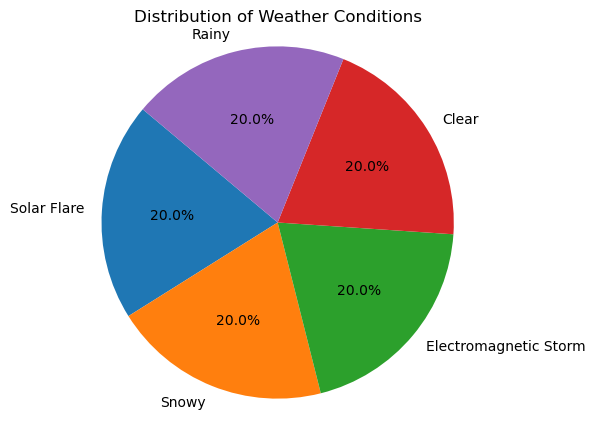

In [8]:
weather_conditions = df["Weather"].value_counts().index.tolist()
percentages = df["Weather"].value_counts().values.tolist()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=weather_conditions, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Weather Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


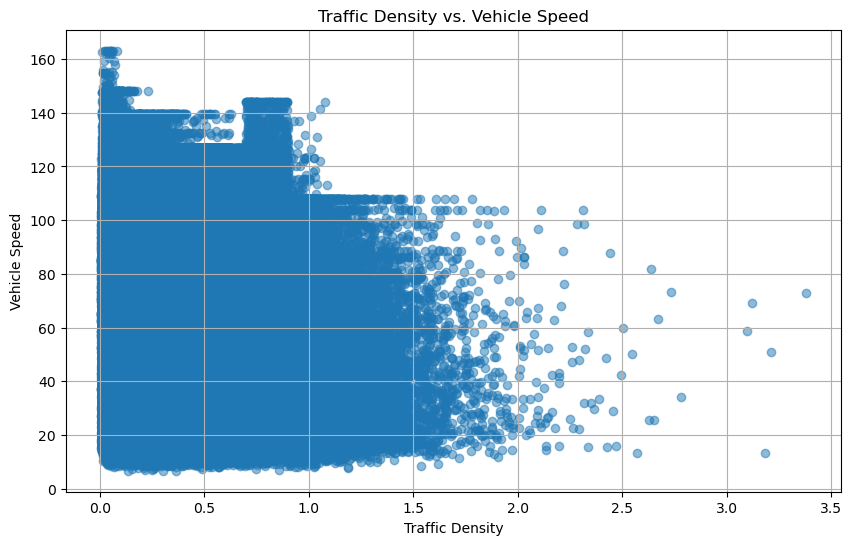

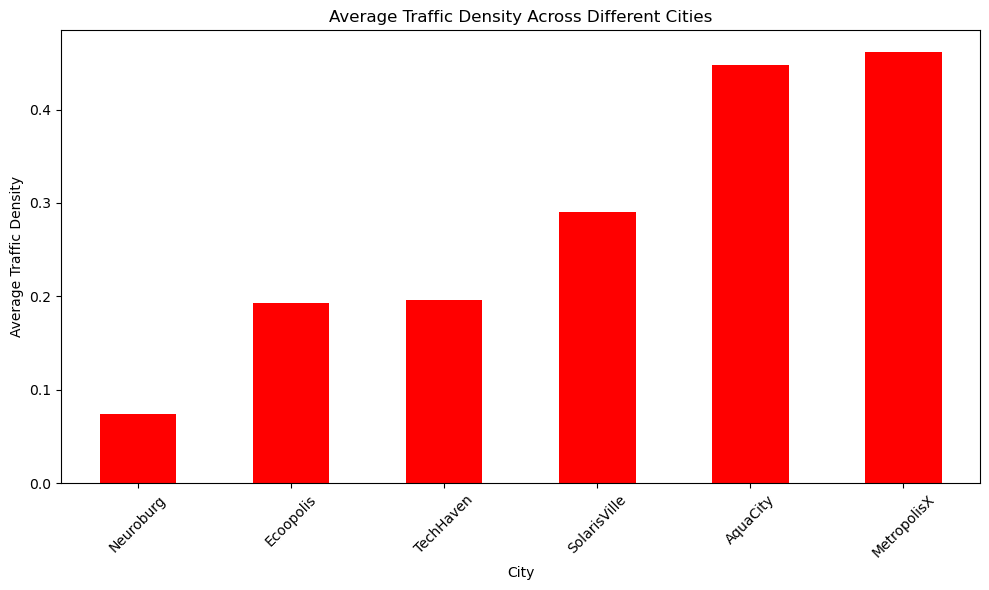

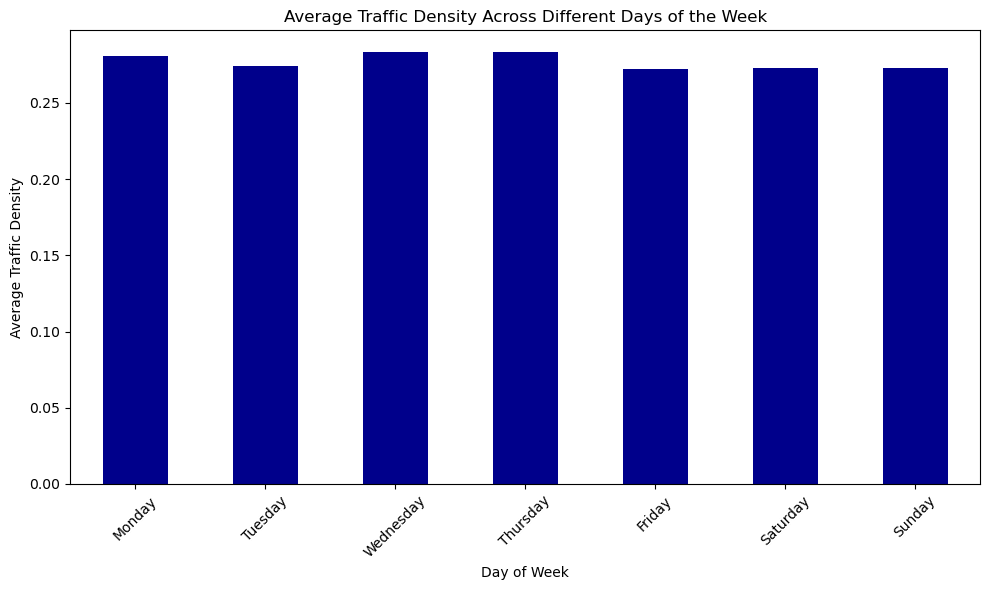

In [9]:


# Scatter plot: Traffic density vs. vehicle speed
plt.figure(figsize=(10, 6))
plt.scatter(df['Traffic Density'], df['Speed'], alpha=0.5, edgecolors="face")
plt.title('Traffic Density vs. Vehicle Speed')
plt.xlabel('Traffic Density')
plt.ylabel('Vehicle Speed')
plt.grid(True)
plt.show()

# Bar plot: Traffic density across different cities
plt.figure(figsize=(10, 6))
city_traffic_density = df.groupby('City')['Traffic Density'].mean().sort_values()
city_traffic_density.plot(kind='bar', color='red')
plt.title('Average Traffic Density Across Different Cities')
plt.xlabel('City')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Traffic density across different days of the week
plt.figure(figsize=(10, 6))
day_traffic_density = df.groupby('Day Of Week')['Traffic Density'].mean()
day_traffic_density.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_traffic_density.plot(kind='bar', color='Darkblue')
plt.title('Average Traffic Density Across Different Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
#Finding Correlation Between variables
correlation_matrix = df[['Traffic Density', 'Speed', 'Energy Consumption']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract correlation coefficients
traffic_density_correlation = correlation_matrix.loc['Traffic Density', 'Traffic Density']
speed_correlation = correlation_matrix.loc['Traffic Density', 'Speed']
energy_consumption_correlation = correlation_matrix.loc['Traffic Density', 'Energy Consumption']

# Display correlation coefficients
print("\nCorrelation Coefficients:")
print(f"Traffic Density vs. Traffic Density: {traffic_density_correlation}")
print(f"Traffic Density vs. Speed: {speed_correlation}")
print(f"Traffic Density vs. Energy Consumption: {energy_consumption_correlation}")


Correlation Matrix:
                    Traffic Density     Speed  Energy Consumption
Traffic Density            1.000000 -0.028211            0.015740
Speed                     -0.028211  1.000000            0.840122
Energy Consumption         0.015740  0.840122            1.000000

Correlation Coefficients:
Traffic Density vs. Traffic Density: 1.0
Traffic Density vs. Speed: -0.028211141160916588
Traffic Density vs. Energy Consumption: 0.015740290641355074


C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


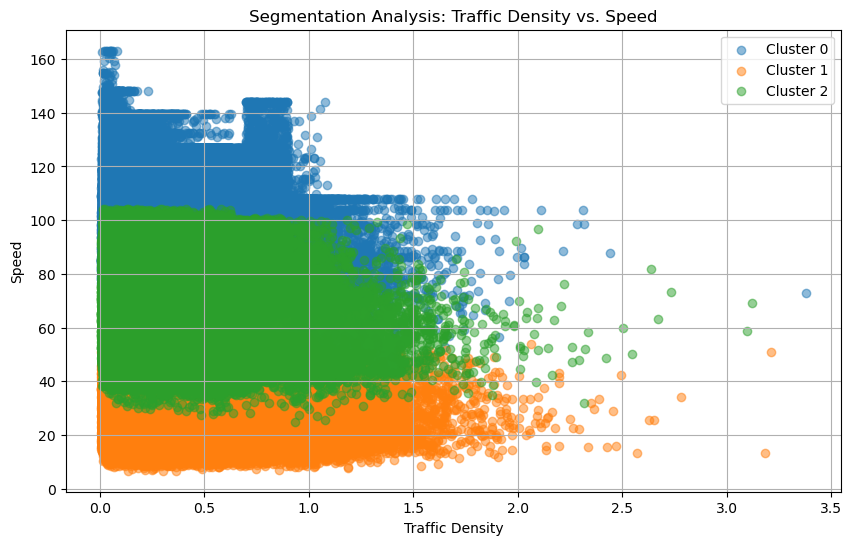

Average Traffic Density within Clusters:
Cluster
0    0.278113
1    0.285330
2    0.268159
Name: Traffic Density, dtype: float64


In [11]:

# Selecting features for clustering
features = ['Traffic Density', 'Speed', 'Energy Consumption']

# Standardize the features
X = df[features]

# Perform K-means clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Traffic Density'], cluster_data['Speed'], label=f'Cluster {cluster}', alpha=0.5)

plt.title('Segmentation Analysis: Traffic Density vs. Speed')
plt.xlabel('Traffic Density')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()

# Analyze traffic patterns within clusters
cluster_traffic_pattern = df.groupby('Cluster')['Traffic Density'].mean()
print("Average Traffic Density within Clusters:")
print(cluster_traffic_pattern)


In [55]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density', 'Cluster'],
      dtype='object')

In [57]:
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Cluster
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241,1
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208,0
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415,0
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811,2
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840,2
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526,1
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564,2
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079,2


In [12]:
# Assuming df is your DataFrame containing the relevant features
numerical_columns = ['Speed', 'Traffic Density', 'Energy Consumption']  # Update with your numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [13]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Cluster
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,-1.145912,0,0,-1.374646,1.127348,1
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,2.209943,0,0,3.722432,0.199469,0
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,1.518685,0,0,1.653447,-1.075281,0
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,0.632894,1,0,-0.134071,-0.438134,2
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,-0.552987,0,0,-0.366740,0.809231,1


In [14]:
# Select features and target variable
features = ['City','Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week', 'Hour Of Day', 'Speed',"Is Peak Hour","Random Event Occurred","Energy Consumption"]
target = 'Traffic Density'

X = df[features]
y = df[target]

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# 1 - Random Forest Model

In [65]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.20186222441813492
R-squared Score: 0.7985252183860866


# 2 - Gradient Boosting Model

In [67]:
# Train Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_GB=mean_squared_error(y_test, y_pred)
r2_GB=r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_GB)
print("R-squared Score:", r2_GB)


Mean Squared Error: 0.20186222441813492
R-squared Score: 0.7985252183860866


# 3 -  L1  Regualrization (Lasso Model)

In [16]:
# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0]  # Try different values for alpha (regularization strength)
}

# Instantiate Lasso Regression model
lasso_model = Lasso()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with optimized hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Best Parameters: {'alpha': 0.1}
Mean Squared Error: 0.6315151376816244
R-squared Score: 0.3696969563421929


# 4 - L2 Regularization (Ridge Model)

In [17]:
# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0]  # Try different values for alpha (regularization strength)
}

# Instantiate Ridge Regression model
ridge_model = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with optimized hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Best Parameters: {'alpha': 1.0}
Mean Squared Error: 0.34372400362563826
R-squared Score: 0.6569357205611273


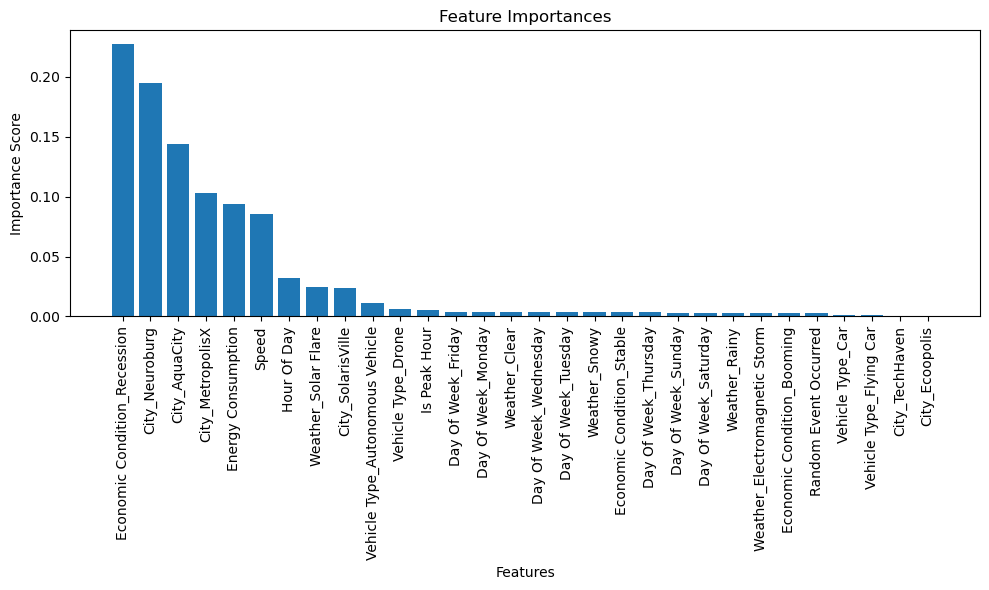

In [66]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Combining Results in one Dataframe

In [18]:
# Create a dictionary to store the results
results = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Lasso', 'Ridge'],
    'Mean Squared Error': [0.20186222441813492, 0.20186222441813492, 0.6315151376816244, 0.34372400362563826],
    'R-squared Score': [0.7985252183860866, 0.7985252183860866, 0.3696969563421929, 0.6569357205611273],
    'Best Parameters': [None, None, {'alpha': 0.1}, {'alpha': 1.0}]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Highlight the model name in the DataFrame
highlight = results_df['Model'].isin(['Random Forest', 'Gradient Boosting'])
results_df['Model'] = results_df['Model'].apply(lambda x: f'**{x}**' if x in ['Random Forest', 'Gradient Boosting'] else x)

# Display the DataFrame
print(results_df)


                   Model  Mean Squared Error  R-squared Score Best Parameters
0      **Random Forest**            0.201862         0.798525            None
1  **Gradient Boosting**            0.201862         0.798525            None
2                  Lasso            0.631515         0.369697  {'alpha': 0.1}
3                  Ridge            0.343724         0.656936  {'alpha': 1.0}


# Model building using Neural Network

In [23]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),  # Additional hidden layer
    keras.layers.Dense(128, activation='relu'),  # Additional hidden layer
    keras.layers.Dense(64, activation='relu'),   # Additional hidden layer
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define callbacks for early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore weights to the best model
)

# Train the model
history = model.fit(X_train_scaled, y_train, verbose=1,epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)


Epoch 1/100
24392/24392 [==============================] - 88s 4ms/step - loss: 0.2521 - val_loss: 0.2253
Epoch 2/100
24392/24392 [==============================] - 86s 4ms/step - loss: 0.2006 - val_loss: 0.1896
Epoch 3/100
24392/24392 [==============================] - 103s 4ms/step - loss: 0.1898 - val_loss: 0.1862
Epoch 4/100
24392/24392 [==============================] - 84s 3ms/step - loss: 0.1865 - val_loss: 0.1919
Epoch 5/100
24392/24392 [==============================] - 85s 3ms/step - loss: 0.1847 - val_loss: 0.1966
Epoch 6/100
24392/24392 [==============================] - 89s 4ms/step - loss: 0.1834 - val_loss: 0.1913
Epoch 7/100
24392/24392 [==============================] - 89s 4ms/step - loss: 0.1823 - val_loss: 0.1837
Epoch 8/100
24392/24392 [==============================] - 85s 4ms/step - loss: 0.1815 - val_loss: 0.1816
Epoch 9/100
24392/24392 [==============================] - 83s 3ms/step - loss: 0.1810 - val_loss: 0.1837
Epoch 10/100
24392/24392 [===================

# Finalize the Neural Network Model 

In [24]:
model.save("neural_network_model.h5")


C:\Users\Ankit\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
